<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Деревья решений, случайные леса (практика)</center></h2>

**Срок сдачи:** 3 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 3 апреля, -4 балла после 06:00 10 апреля, -6 баллов после 06:00 17 апреля

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Практика

### Качество вина (10 баллов)

Давайте все-таки разберемся с [вином](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)!


#### Задание (1 балл)
* Загрузите данные, выполните преобразование целевой переменной: 
    * quality > 5 -> 1
    * quality <= 5 -> 0
* Разделите выборку на обучающую и контрольную в пропорции 80/20

In [3]:
# Your Code Here
df_wine = pd.read_csv('wines.csv', sep=',', index_col=0)


In [4]:
def preprocess_wine(df):
    df.loc[:, 'quality_cat'] = (df.loc[:, 'quality'] > 5).astype(int)
    df = df.drop('quality', axis=1)
    
    return df

In [5]:
df_wine = preprocess_wine(df_wine)

In [6]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [7]:
from sklearn.model_selection import train_test_split

df_wine_train, df_wine_test = train_test_split(df_wine, test_size = 0.2)

In [8]:
df_wine_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cat
982,7.3,0.520,0.32,2.1,0.070,51.0,70.0,0.99418,3.34,0.82,12.9,1
427,9.5,0.780,0.22,1.9,0.077,6.0,32.0,0.99880,3.26,0.56,10.6,1
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,0
1371,7.5,0.580,0.56,3.1,0.153,5.0,14.0,0.99476,3.21,1.03,11.6,1
734,7.7,0.560,0.20,2.0,0.075,9.0,39.0,0.99870,3.48,0.62,9.3,0


#### Задание (2 балла)

Сфокусируемся на одном гиперпараметре деревьев решений - максимальной глубине.

Подберите наилучшую глубину `d` дерева с помошью 
* Усредненной оценки качества roc-auc на кросс-валидации при различных `d`
* Валидационных кривых

In [9]:
from sklearn.tree import DecisionTreeClassifier

try:
    from sklearn.model_selection import cross_val_score
except ImportError:
    from sklearn.cross_validation import cross_val_score

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

In [10]:
# Your Code Here
X_train, y_train = df_wine_train.iloc[:, :-1].values, df_wine_train.iloc[:, -1].values


In [11]:
#кросс-валидация с roc-auc
max_score = 0
best_depth = 0

for depth in xrange(100):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth+1)
    scores = cross_val_score(tree, X_train, y_train, scoring='roc_auc', cv=5)
    if(max_score<scores.mean()):
        max_score = scores.mean()
        best_depth = depth+1
print 'The best depth is %i' % best_depth

The best depth is 5


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'Verdana'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


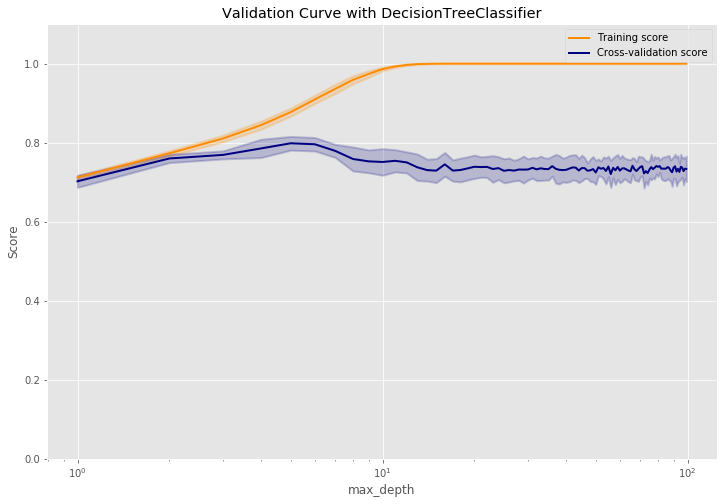

In [12]:
#Валидационные кривые с roc-auc (здесь не очень понял, нужно использовать roc-auc или что-то другое)
#Модифицировал код из примера в sclearn, в логарифмической шкале нагляднее
depths = np.arange(1, 100, 1, dtype=int)
tree = DecisionTreeClassifier(criterion='entropy')
train_scores, test_scores = validation_curve(tree, X_train, y_train, param_name='max_depth', param_range=depths,
                                             cv=5, scoring="roc_auc")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with DecisionTreeClassifier")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)

lw = 2
plt.semilogx(depths, train_scores_mean, label="Training score", color="darkorange", lw=lw)
plt.fill_between(depths, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(depths, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
plt.fill_between(depths, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()



#### Задание (1 балл)

Отсортируйте признаки по важности. Вектор с важностью признаков можно получить с помощью `model.feature_importances_`

In [13]:
# Your Code Here
tree = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
tree.fit(X_train, y_train)
tree.feature_importances_

array([ 0.01107557,  0.09232999,  0.02815951,  0.03271895,  0.02545154,
        0.00952852,  0.09575354,  0.01462059,  0.05434976,  0.18493664,
        0.45107541])

In [14]:
#Отсортировал и вывел названия признаков по важности
imp_fts = {}

for i in xrange(len(tree.feature_importances_)):
    imp_fts[df_wine_train.columns.values[i]]=tree.feature_importances_[i]

for f in sorted(imp_fts, key=imp_fts.get, reverse=True):
    print '%.2f' %imp_fts[f], f

0.45 alcohol
0.18 sulphates
0.10 total sulfur dioxide
0.09 volatile acidity
0.05 pH
0.03 residual sugar
0.03 citric acid
0.03 chlorides
0.01 density
0.01 fixed acidity
0.01 free sulfur dioxide


#### Задание (2 балла)
* Получите предсказания на тестовой выборке
* Постройте ROC кривые для обучающей и тестовой выборок
* Посчитайте остальные меры качества классификации при пороге в `0.5`

In [15]:
# Your Code Here
from sklearn.metrics import roc_curve

In [16]:
#Делаем предсказание на тестовой выборке и смотрим, насколько хорошо классифицируются данные (доля угаданных)
X_test, y_test = df_wine_test.iloc[:, :-1].values, df_wine_test.iloc[:, -1].values

y_predicted = tree.predict(X_test)

print tree.score(X_test, y_test)

0.746875


In [17]:
#Строим ROC-кривые
p_predicted_train = tree.predict_proba(X_train)
p_predicted_test = tree.predict_proba(X_test)
fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train, p_predicted_train[:,1])
fpr_ts, tpr_ts, thresholds_ts = roc_curve(y_test, p_predicted_test[:,1])

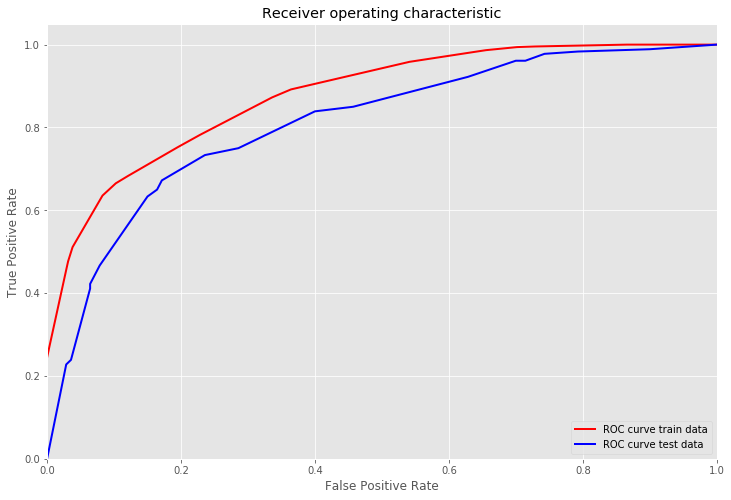

In [18]:
plt.figure()
lw = 2
plt.plot(fpr_tr, tpr_tr, color='red', lw=lw, label='ROC curve train data' )
plt.plot(fpr_ts, tpr_ts, color='blue', lw=lw, label='ROC curve test data' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [19]:
y_pred_train = (p_predicted_train[:,1]>0.5).astype(int)
y_pred_test = (p_predicted_test[:,1]>0.5).astype(int)

In [20]:
from sklearn.metrics import *
print '%.2f' %accuracy_score(y_train, y_pred_train), 'accuracy, train set'
print '%.2f' %accuracy_score(y_test, y_pred_test), 'accuracy, test set'
print '%.2f' %precision_score(y_train, y_pred_train), 'precision, train set'
print '%.2f' %precision_score(y_test, y_pred_test), 'precision, test set'
print '%.2f' %f1_score(y_train, y_pred_train), 'f1_score, train set'
print '%.2f' %f1_score(y_test, y_pred_test), 'f1_score, test set'
print '%.2f' %hamming_loss(y_train, y_pred_train), 'hamming_loss, train set'
print '%.2f' %hamming_loss(y_test, y_pred_test), 'hamming_loss, test set'
print '%.2f' %matthews_corrcoef(y_train, y_pred_train), 'matthews_corrcoef, train set'
print '%.2f' %matthews_corrcoef(y_test, y_pred_test), 'matthews_corrcoef, test set'
print '%.2f' %recall_score(y_train, y_pred_train), 'recall, train set'
print '%.2f' %recall_score(y_test, y_pred_test), 'recall, test set'
print '%.2f' %zero_one_loss(y_train, y_pred_train), 'zero_one_loss, train set'
print '%.2f' %zero_one_loss(y_test, y_pred_test), 'zero_one_loss, test set'
print '%.2f' %roc_auc_score(y_train, p_predicted_train[:,1]), 'roc_auc_score, train set'
print '%.2f' %roc_auc_score(y_test, p_predicted_test[:,1]), 'roc_auc_score, test set'

0.78 accuracy, train set
0.75 accuracy, test set
0.81 precision, train set
0.80 precision, test set
0.78 f1_score, train set
0.77 f1_score, test set
0.22 hamming_loss, train set
0.25 hamming_loss, test set
0.56 matthews_corrcoef, train set
0.49 matthews_corrcoef, test set
0.75 recall, train set
0.73 recall, test set
0.22 zero_one_loss, train set
0.25 zero_one_loss, test set
0.88 roc_auc_score, train set
0.81 roc_auc_score, test set


#### Задание (1 балл)
Перейдем к модели случайного леса. Зафиксируем некоторую глубину дерева (можно звять оптимальное с предыдущих заданий).

Сравните качество работы 
* Простого дерева решений
* Бэггинга над 10,20,...,100 деревьями решений
* Случайного леса с 10,20,...,100 деревьями решений

Получите график, у которого по оси X откладывается количество деревьев, а по оси Y - качество классификации.

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
#Качество (по метрике roc-auc) простого дерева решений 

print '%.2f' %roc_auc_score(y_train, p_predicted_train[:,1]), 'roc_auc_score, train set'
print '%.2f' %roc_auc_score(y_test, p_predicted_test[:,1]), 'roc_auc_score, test set'

0.88 roc_auc_score, train set
0.81 roc_auc_score, test set


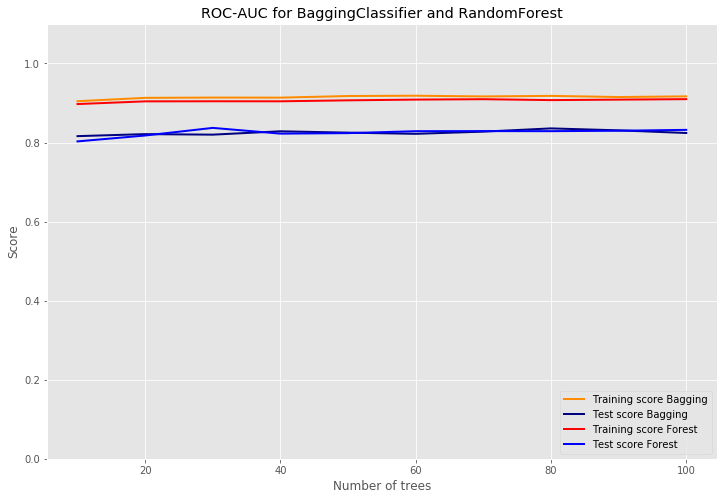

In [23]:
# Зависимость качества классификации BaggingClassifier и RandomForest для разного количества деревьев
# Для такого количества деревьев зависимости не прослеживается, отдельно проверял по метрике accuracy - то же самое
#Разницы BaggingClassifier и RandomForest тоже не наблюдается
num_trees = np.arange(10, 110, 10, dtype=int)
scr_train_bg = np.zeros(num_trees.shape, dtype=float)
scr_test_bg = np.zeros(num_trees.shape, dtype=float)
scr_train_fr = np.zeros(num_trees.shape, dtype=float)
scr_test_fr = np.zeros(num_trees.shape, dtype=float)

i=0
for num in num_trees:
    bag_trees = BaggingClassifier(tree, n_estimators=num)
    forest = RandomForestClassifier(criterion='entropy', max_depth=best_depth, n_estimators=num) #Энтропия, чтобы везде был один критерий
    bag_trees.fit(X_train, y_train)
    forest.fit(X_train, y_train)
    scr_train_bg[i] = roc_auc_score(y_train, bag_trees.predict_proba(X_train)[:,1]) 
    scr_test_bg[i] = roc_auc_score(y_test, bag_trees.predict_proba(X_test)[:,1]) 
    scr_train_fr[i] = roc_auc_score(y_train, forest.predict_proba(X_train)[:,1]) 
    scr_test_fr[i] = roc_auc_score(y_test, forest.predict_proba(X_test)[:,1]) 
    i+=1
    
plt.title("ROC-AUC for BaggingClassifier and RandomForest")
plt.xlabel("Number of trees")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)

lw = 2

plt.plot(num_trees, scr_train_bg, label="Training score Bagging", color="darkorange", lw=lw)
plt.plot(num_trees, scr_test_bg, label="Test score Bagging", color="navy", lw=lw)
plt.plot(num_trees, scr_train_fr, label="Training score Forest", color="red", lw=lw)
plt.plot(num_trees, scr_test_fr, label="Test score Forest", color="blue", lw=lw)
plt.legend(loc="lower right")
plt.show()

In [24]:
#Качество предсказания случайного леса и бэггинга деревьев выше, чем у простого дерева решений
print '%.2f' %scr_train_bg[1], 'roc_auc_score, train set, BaggingClassifier'
print '%.2f' %scr_test_bg[1], 'roc_auc_score, test set, BaggingClassifier'
print '%.2f' %scr_train_fr[1], 'roc_auc_score, train set, RandomForest'
print '%.2f' %scr_test_fr[1], 'roc_auc_score, test set, RandomForest'

0.91 roc_auc_score, train set, BaggingClassifier
0.82 roc_auc_score, test set, BaggingClassifier
0.90 roc_auc_score, train set, RandomForest
0.82 roc_auc_score, test set, RandomForest


####  Задание (3 балла)
* С помощью `GridSearchCV` или `RandomSearchCV` подберите наиболее оптимальные параметры для случайного леса.
* Для этих параметров сравните средние результаты по кросс-валидации и качество на контрольной выборке

In [1]:
# Your Code Here
from sklearn.model_selection import GridSearchCV

In [28]:
#Запускал на сетах параметров с широкой сеткой, чтобы лучше представлять, куда примерно двигаться
forest = RandomForestClassifier(criterion='entropy', max_depth=best_depth)
params={}
params['max_depth']=[2, 5, 8, 10, 30, 40, 50, 60, 70, 80]
params['n_estimators']=[2, 5, 10, 30, 50, 70, 80, 100, 150]
params['max_features']=[1, 2, 4, 6, 8]
params['min_samples_split']=[2, 3, 4, 5, 10]
params['min_samples_leaf']=[1, 2, 4, 6, 10]

GS = GridSearchCV(forest, n_jobs=-1, param_grid=params, scoring='roc_auc')
GS.fit(X_train, y_train)
print GS.best_params_
print GS.best_score_

{'max_features': 1, 'min_samples_split': 2, 'n_estimators': 150, 'max_depth': 80, 'min_samples_leaf': 1}
0.872097819914


In [33]:
#Здесь ещё уточняем параметры
forest_1 = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, max_features=1)
params_opt={}
params_opt['max_depth'] = [80, 90, 100, 110, 120, 130, 150, 200]
params_opt['n_estimators'] = [150, 160, 170, 180, 200, 250]
GS_opt = GridSearchCV(forest_1, n_jobs=-1, param_grid=params_opt, scoring='roc_auc')

GS_opt.fit(X_train, y_train)

print GS_opt.best_params_
print GS_opt.best_score_

{'n_estimators': 170, 'max_depth': 200}
0.873797661843


In [36]:
#Улучшение в третьем знаке после запятой - дальше смысла мало, видимо. И глубина дерева уже довольно большая.
#На этих параметрах для тестовой выборки качество получается выше, чем без подбора параметров

forest_opt = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2,
                                  max_features=1, max_depth=200, n_estimators=170)
forest_opt.fit(X_train, y_train)
print roc_auc_score(y_test, forest_opt.predict_proba(X_test)[:,1]) 

0.886626984127


In [37]:
#Оценка по кросс-валидации на тренировочном сете
#Качество практически такое же, как и для тестовой выборки, но ниже, чем было без подбора параметров для тренировочного сета.
#Модель стала менее переобученной.
scores = cross_val_score(forest_opt, X_train, y_train, scoring='roc_auc', cv=5)
print scores.mean()

0.884059483726
